In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from scipy.optimize import curve_fit
from main import measure
from helper import view, view_phase

# Setup
## Load the sample

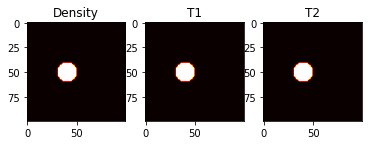

In [2]:
sample = np.load(f"{os.getcwd()}/sample.npy")
view(sample)

## Setup magnetic field
It is necessary to add some noise to the magnetic field. Otherwise, the magnetic
field will be perfectly homogenous, which is unrealistic. Furthermore, is a slight
inhomogeneity in the magnetic field necessary for spin echos.

In [3]:
b0 = np.zeros(sample.shape[:2])
b0.fill(0.43)
b0 += np.random.normal(0, 0.001, b0.shape)

Setup phases and measurement time

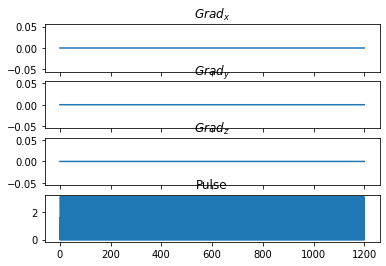

In [4]:
echotime = 2  # ms
echos = 300
tfactor = 100  # how many steps per 1ms

t = echotime * echos * 2 # ms

# phases = [Gradx, Grady, Gradz, Pulse]
phases = np.zeros((t * tfactor, 4))
phases[0, 3] = np.pi / 2  # start pulse
for i in range(echos):
    phases[tfactor * echotime * (2 * i + 1), 3] = np.pi
view_phase(phases, tfactor)


# Measure

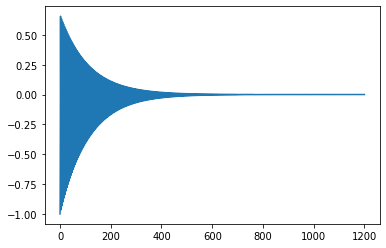

In [5]:
ts = np.linspace(0, t, t * tfactor, True)
signal = measure(sample, b0, tfactor, phases)

plt.plot(ts, signal)
plt.show()

# Results
Fit exponential function to determine t2

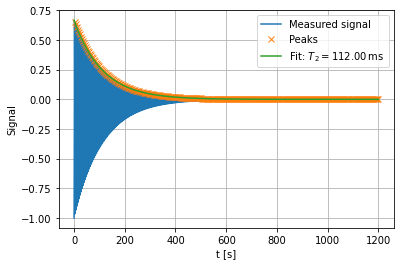

In [6]:
peaks = find_peaks(signal)[0]

f = lambda t, t2, a: a * np.exp(- t / t2)
popt, pcov = curve_fit(f, ts[peaks], signal[peaks], p0=[0.2, 10])
f = np.vectorize(lambda t: popt[1] * np.exp(- t / popt[0]))

plt.plot(ts, signal, label="Measured signal")
plt.plot(ts[peaks], signal[peaks], "x", label="Peaks")
plt.plot(ts, f(ts), label=f"Fit: $T_2 = {popt[0]:.2f}\,$ms")
plt.ylabel("Signal")
plt.xlabel("t [s]")
plt.grid()
plt.legend()
plt.show()

This result is consistent with the value we inserted into the measurement.
Since the simulation can not determine material specific properties, these were
encoded into the sample.

In [7]:
print(np.max(sample[:, :, 2]))

112
